# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

#set to display all the columns in datset

pd.set_option("display.max_columns",None)

# importing dataset

In [66]:
Bankdata=pd.read_csv("bank-additional-full.csv")
Bankdata_BK=Bankdata.copy()
Bankdata.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


# Data preprocessing

In [3]:
columns = Bankdata.columns[0].split(";")
columns

['age',
 '"job"',
 '"marital"',
 '"education"',
 '"default"',
 '"housing"',
 '"loan"',
 '"contact"',
 '"month"',
 '"day_of_week"',
 '"duration"',
 '"campaign"',
 '"pdays"',
 '"previous"',
 '"poutcome"',
 '"emp.var.rate"',
 '"cons.price.idx"',
 '"cons.conf.idx"',
 '"euribor3m"',
 '"nr.employed"',
 '"y"']

In [4]:
def dataPreprocessor(df):
    rows = []
    columns = []
    columns = df.columns[0].split(";")
    for index in df.iterrows():
        rows.append(index[1][0].split(";"))
    return pd.DataFrame(rows, columns=columns)

In [5]:
Bankdata = dataPreprocessor(Bankdata)
Bankdata

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",442,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [6]:
Bankdata.columns

Index(['age', '"job"', '"marital"', '"education"', '"default"', '"housing"',
       '"loan"', '"contact"', '"month"', '"day_of_week"', '"duration"',
       '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"emp.var.rate"',
       '"cons.price.idx"', '"cons.conf.idx"', '"euribor3m"', '"nr.employed"',
       '"y"'],
      dtype='object')

In [7]:
Bankdata.columns = Bankdata.columns.str.replace('"', '')
Bankdata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",442,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [8]:
for i in Bankdata.columns:
    Bankdata[i] = Bankdata[i].str.replace('"','')
Bankdata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
Bankdata.dtypes

age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [10]:
Bankdata[['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'age']] = Bankdata[['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'age']].apply(pd.to_numeric)


In [11]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
Bankdata.rename(columns={'emp.var.rate': 'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed','y':'target'}, inplace=True)

In [12]:
Bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
Bankdata_BK=Bankdata.copy()

# dataset information

In [14]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
Bankdata.shape

(41188, 21)

In [16]:
Bankdata.describe().style.background_gradient(cmap = 'rainbow')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
Bankdata.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [18]:
Bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Data visualisation 

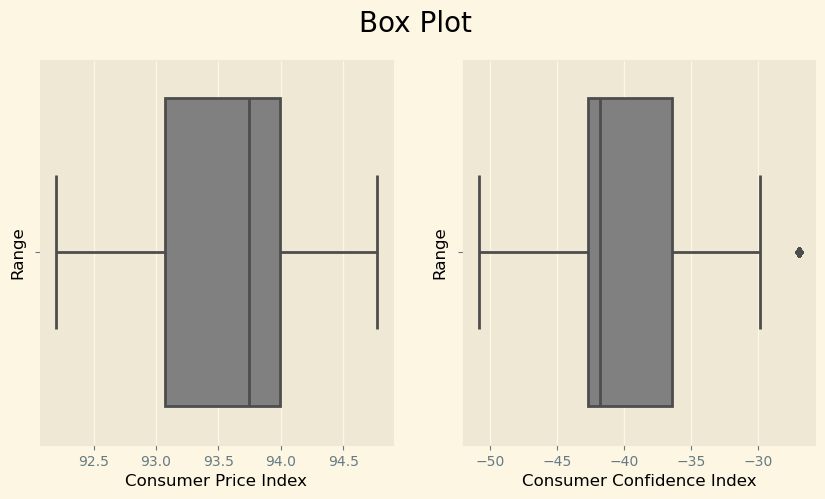

In [21]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('Solarize_Light2')

plt.subplot(1, 2, 1)
sns.boxplot(x = Bankdata['cons_price_idx'], color = 'gray')
plt.xlabel('Consumer Price Index', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.subplot(1, 2, 2)
sns.boxplot(x = Bankdata['cons_conf_idx'], color = 'gray')
plt.xlabel('Consumer Confidence Index', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

# cleaning the data

In [22]:
Bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
target            0
dtype: int64

In [23]:
Bankdata_dup=Bankdata[Bankdata.duplicated(keep='last')]
Bankdata_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [24]:
Bankdata=Bankdata.drop_duplicates()

In [25]:
Bankdata.shape

(41176, 21)

In [26]:
Bankdata.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
target               2
dtype: int64

In [27]:
Bankdata.select_dtypes('object').head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,target
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [28]:
Bankdata.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [29]:
Bankdata.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [30]:
Bankdata.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [31]:
Bankdata.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [32]:
Bankdata.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [33]:
Bankdata.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [34]:
Bankdata.contact.value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [35]:
Bankdata.month.value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [36]:
Bankdata.day_of_week.value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [37]:
Bankdata.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [38]:
Bankdata.target.value_counts()

no     36537
yes     4639
Name: target, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [40]:
cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','target']

In [41]:
Bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
target             object
dtype: object

In [42]:
for i in cols:
  Bankdata[i]=LE.fit_transform(Bankdata[i])

In [43]:
Bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
Bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target'],
      dtype='object')

In [45]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null 

# Splitting test and train data

In [46]:
IndepVar = []
for col in Bankdata.columns:
    if col != 'target':
        IndepVar.append(col)

TargetVar = 'target'

x = Bankdata[IndepVar]
y = Bankdata[TargetVar]

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Shape of the x test :", x_test.shape)
print("Shape of the x train :", x_train.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the y train :", y_train.shape)

Shape of the x test : (8236, 20)
Shape of the x train : (32940, 20)
Shape of the y test : (8236,)
Shape of the y train : (32940,)


In [48]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Knn classifiers 

In [49]:
KNN_Results = pd.read_csv('KNN_Results.csv')

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 327  644]
 [ 493 6772]]
Outcome values : 
 327 644 493 6772
Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.34      0.37       971
           0       0.91      0.93      0.92      7265

    accuracy                           0.86      8236
   macro avg       0.66      0.63      0.64      8236
weighted avg       0.85      0.86      0.86      8236

Accuracy : 86.2 %
Precision : 39.9 %
Recall : 33.7 %
F1 Score : 0.365
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 63.5 %
MCC : 0.29
roc_auc_score: 0.634


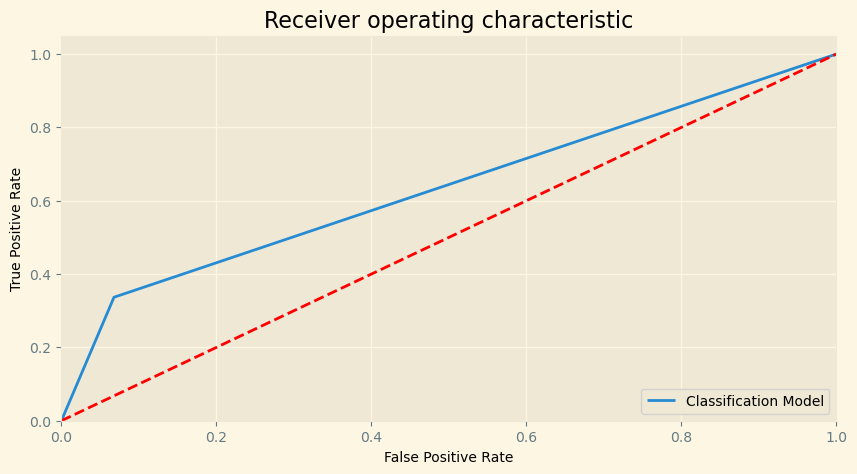

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 158  813]
 [ 132 7133]]
Outcome values : 
 158 813 132 7133
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.16      0.25       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.72      0.57      0.59      8236
weighted avg       0.86      0.89      0.86      8236

Accuracy : 88.5 %
Precision : 54.5 %
Recall : 16.3 %
F1 Score : 0.251
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 57.2 %
MCC : 0.253
roc_auc_score: 0.572


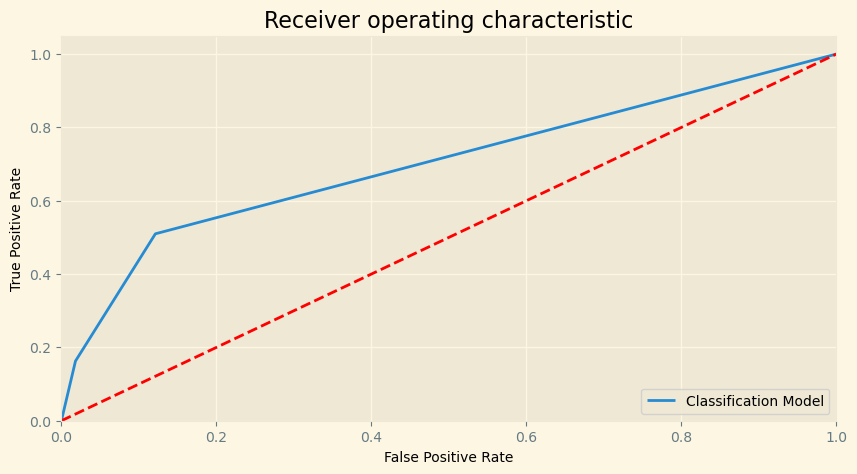

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 292  679]
 [ 273 6992]]
Outcome values : 
 292 679 273 6992
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.30      0.38       971
           0       0.91      0.96      0.94      7265

    accuracy                           0.88      8236
   macro avg       0.71      0.63      0.66      8236
weighted avg       0.86      0.88      0.87      8236

Accuracy : 88.4 %
Precision : 51.7 %
Recall : 30.1 %
F1 Score : 0.38
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 63.2 %
MCC : 0.336
roc_auc_score: 0.632


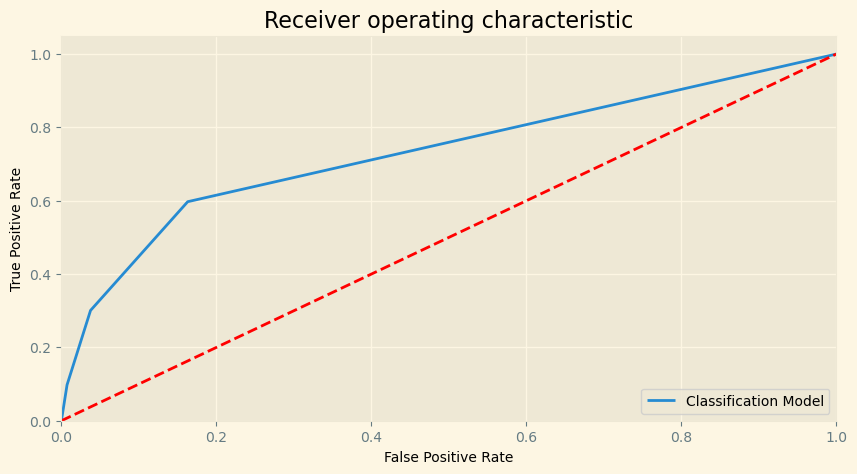

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 192  779]
 [ 138 7127]]
Outcome values : 
 192 779 138 7127
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.20      0.30       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.74      0.59      0.62      8236
weighted avg       0.86      0.89      0.86      8236

Accuracy : 88.9 %
Precision : 58.2 %
Recall : 19.8 %
F1 Score : 0.295
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 59.0 %
MCC : 0.294
roc_auc_score: 0.589


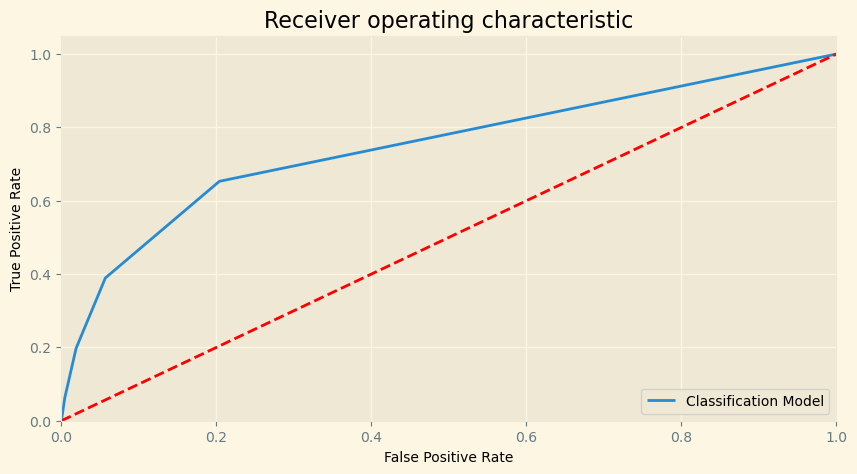

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 260  711]
 [ 209 7056]]
Outcome values : 
 260 711 209 7056
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.27      0.36       971
           0       0.91      0.97      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.73      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 88.8 %
Precision : 55.4 %
Recall : 26.8 %
F1 Score : 0.361
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 61.9 %
MCC : 0.333
roc_auc_score: 0.619


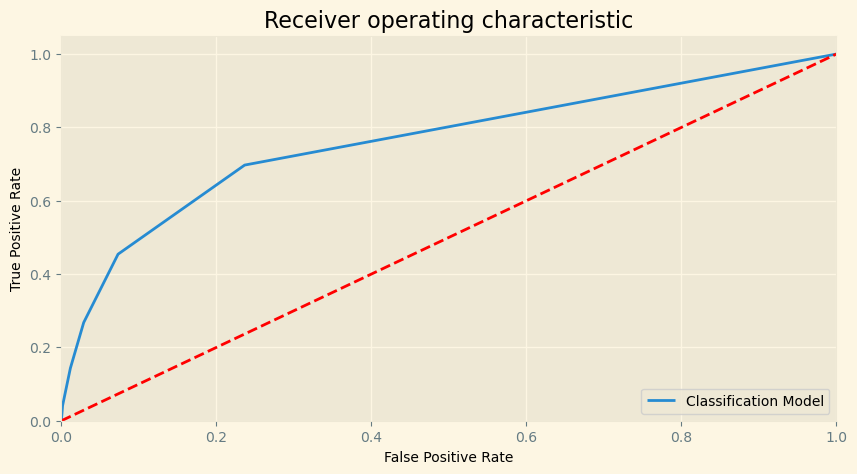

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 203  768]
 [ 133 7132]]
Outcome values : 
 203 768 133 7132
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.21      0.31       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.75      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.1 %
Precision : 60.4 %
Recall : 20.9 %
F1 Score : 0.311
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 59.6 %
MCC : 0.311
roc_auc_score: 0.595


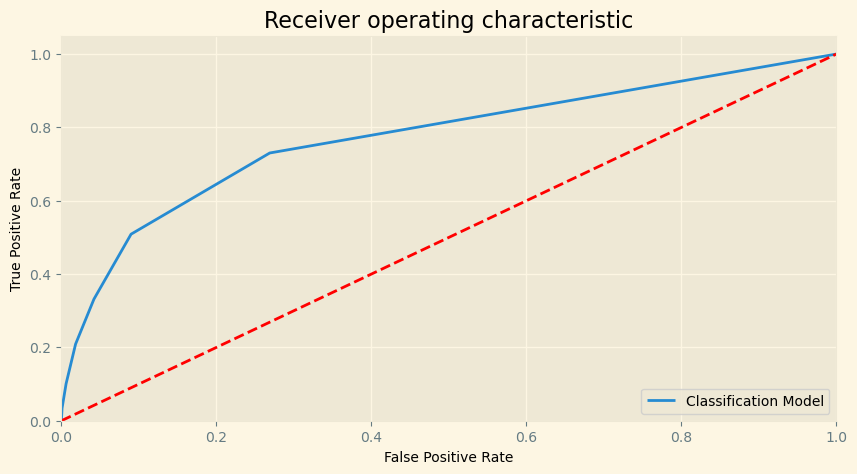

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 252  719]
 [ 187 7078]]
Outcome values : 
 252 719 187 7078
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.26      0.36       971
           0       0.91      0.97      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.74      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.0 %
Precision : 57.4 %
Recall : 26.0 %
F1 Score : 0.357
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 61.7 %
MCC : 0.336
roc_auc_score: 0.617


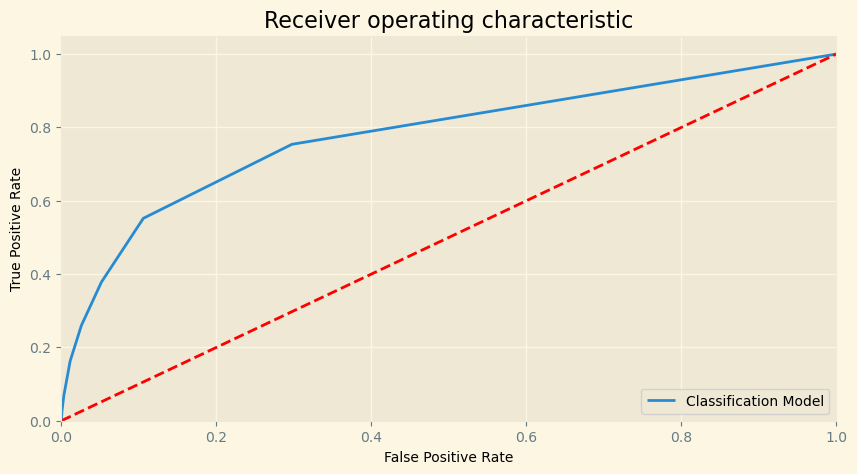

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 200  771]
 [ 131 7134]]
Outcome values : 
 200 771 131 7134
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.21      0.31       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.75      0.59      0.62      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.0 %
Precision : 60.4 %
Recall : 20.6 %
F1 Score : 0.307
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 59.4 %
MCC : 0.309
roc_auc_score: 0.594


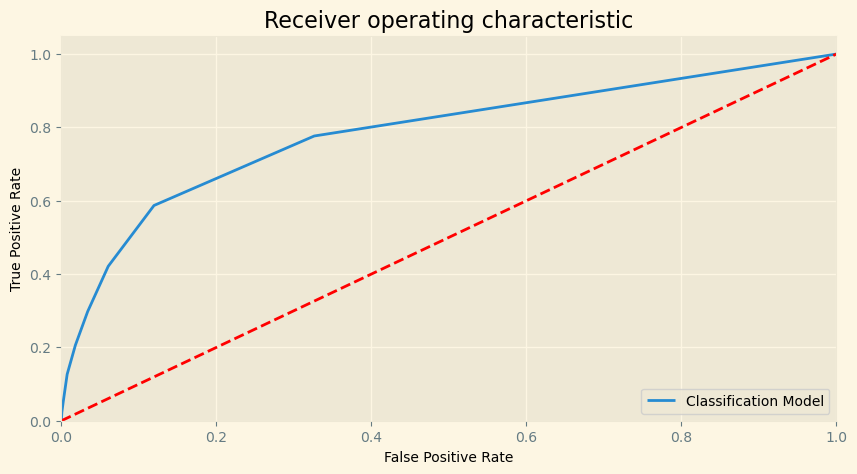

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 236  735]
 [ 171 7094]]
Outcome values : 
 236 735 171 7094
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.24      0.34       971
           0       0.91      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.74      0.61      0.64      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.0 %
Precision : 58.0 %
Recall : 24.3 %
F1 Score : 0.343
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 60.9 %
MCC : 0.327
roc_auc_score: 0.61


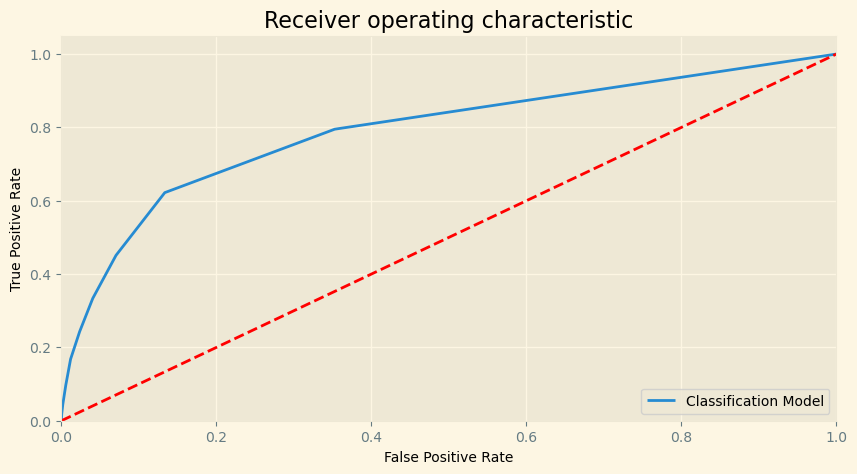

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 205  766]
 [ 119 7146]]
Outcome values : 
 205 766 119 7146
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.21      0.32       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.3 %
Precision : 63.3 %
Recall : 21.1 %
F1 Score : 0.317
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 59.8 %
MCC : 0.323
roc_auc_score: 0.597


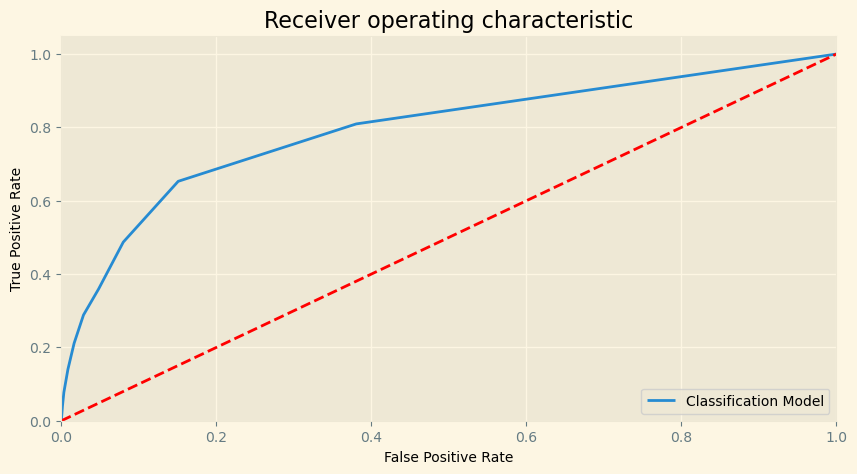

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 235  736]
 [ 152 7113]]
Outcome values : 
 235 736 152 7113
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.24      0.35       971
           0       0.91      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.76      0.61      0.64      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 60.7 %
Recall : 24.2 %
F1 Score : 0.346
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 61.0 %
MCC : 0.337
roc_auc_score: 0.611


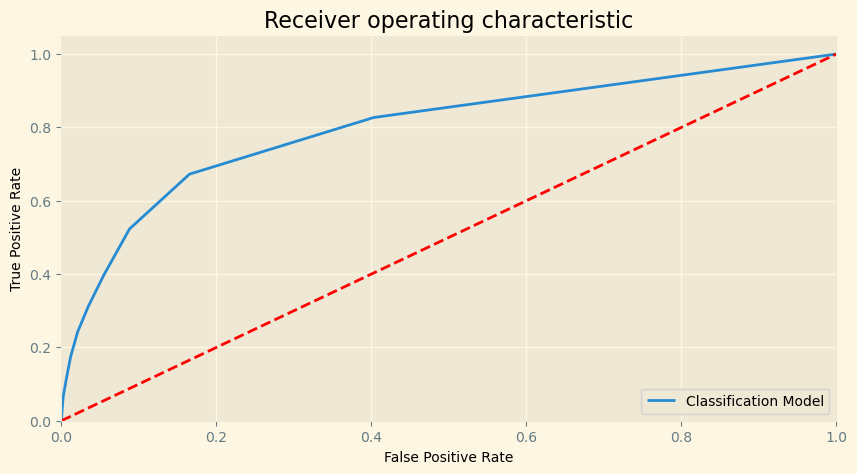

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 206  765]
 [ 116 7149]]
Outcome values : 
 206 765 116 7149
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.21      0.32       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.3 %
Precision : 64.0 %
Recall : 21.2 %
F1 Score : 0.319
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 59.8 %
MCC : 0.326
roc_auc_score: 0.598


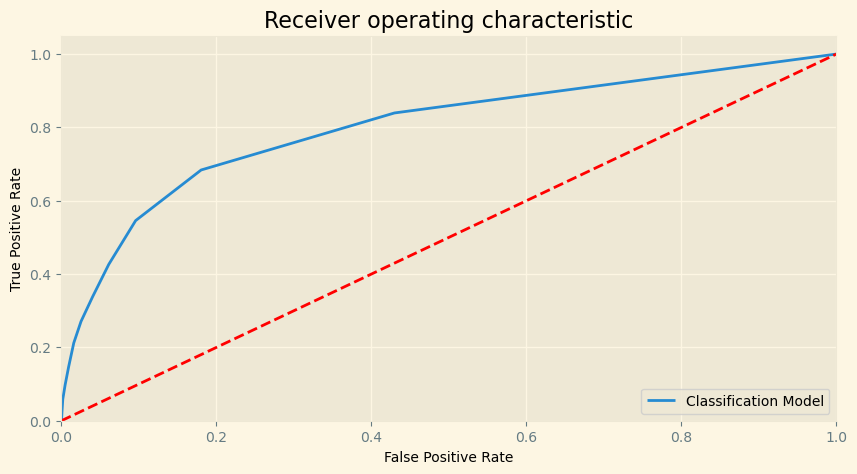

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 236  735]
 [ 155 7110]]
Outcome values : 
 236 735 155 7110
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.24      0.35       971
           0       0.91      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.75      0.61      0.64      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 60.4 %
Recall : 24.3 %
F1 Score : 0.347
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 61.1 %
MCC : 0.336
roc_auc_score: 0.611


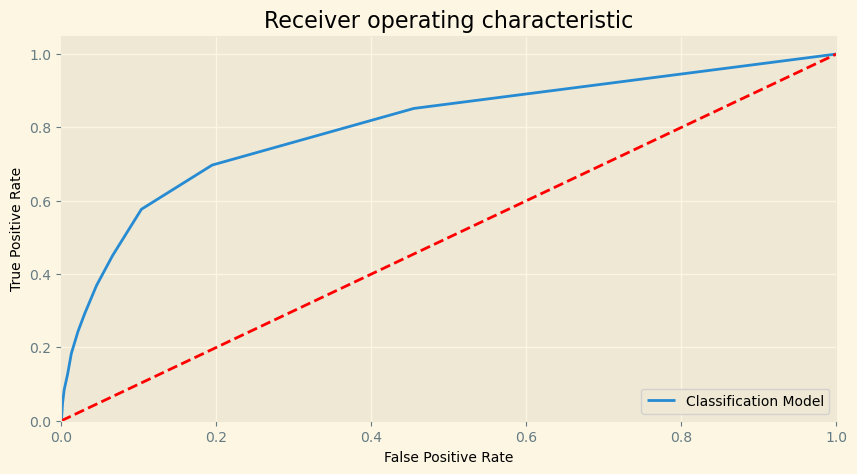

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 206  765]
 [ 115 7150]]
Outcome values : 
 206 765 115 7150
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.21      0.32       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.3 %
Precision : 64.2 %
Recall : 21.2 %
F1 Score : 0.319
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 59.8 %
MCC : 0.327
roc_auc_score: 0.598


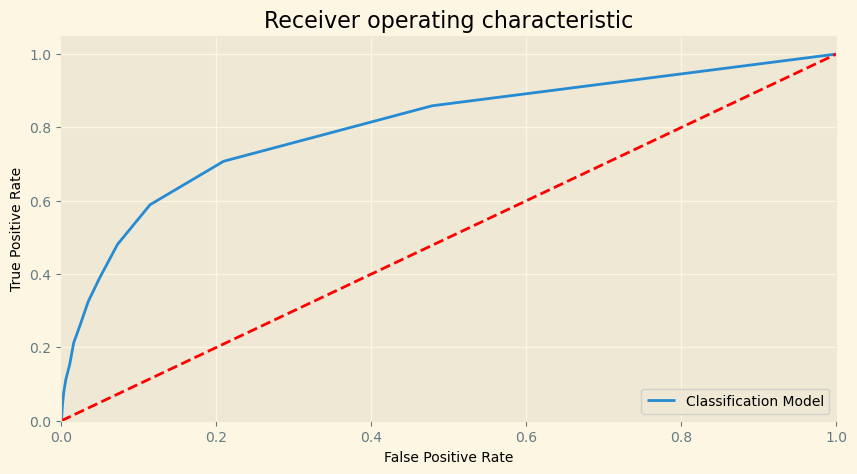

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 222  749]
 [ 143 7122]]
Outcome values : 
 222 749 143 7122
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.23      0.33       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.76      0.60      0.64      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 60.8 %
Recall : 22.9 %
F1 Score : 0.332
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 60.4 %
MCC : 0.327
roc_auc_score: 0.604


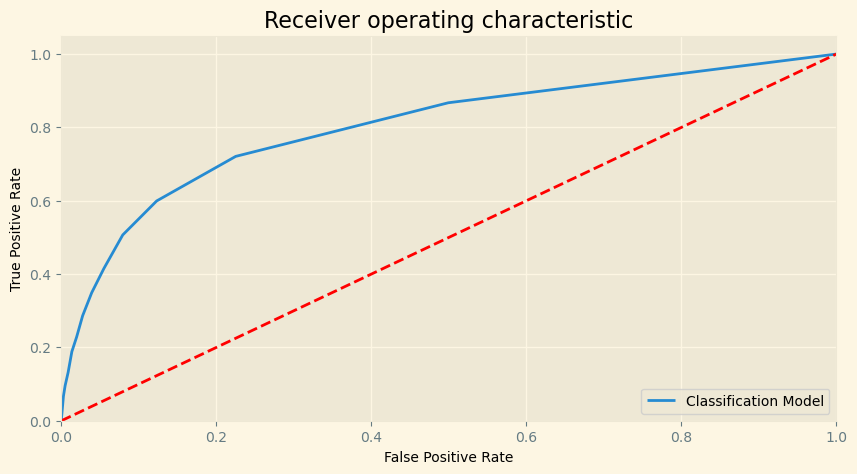

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 201  770]
 [ 117 7148]]
Outcome values : 
 201 770 117 7148
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.21      0.31       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 63.2 %
Recall : 20.7 %
F1 Score : 0.312
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 59.6 %
MCC : 0.32
roc_auc_score: 0.595


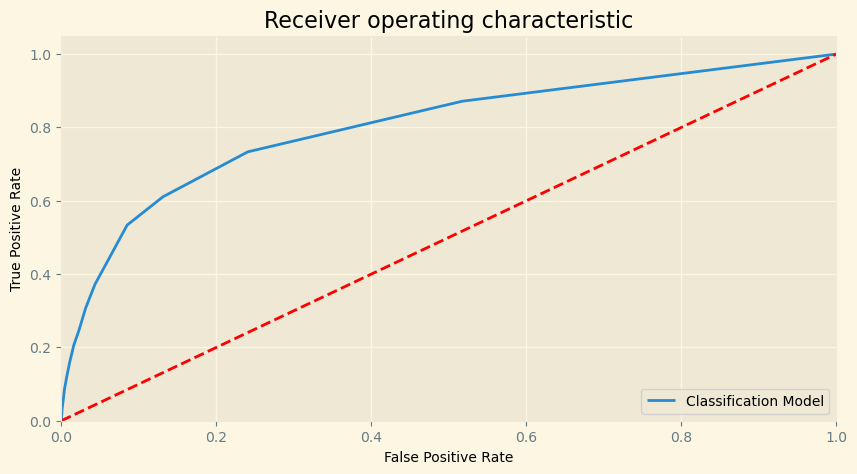

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 209  762]
 [ 127 7138]]
Outcome values : 
 209 762 127 7138
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.22      0.32       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.76      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 62.2 %
Recall : 21.5 %
F1 Score : 0.32
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 59.9 %
MCC : 0.322
roc_auc_score: 0.599


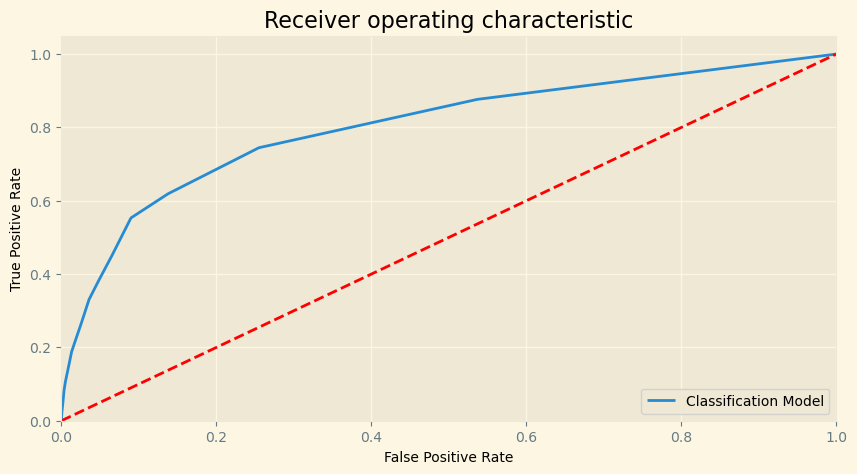

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 194  777]
 [ 109 7156]]
Outcome values : 
 194 777 109 7156
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.20      0.30       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.59      0.62      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.2 %
Precision : 64.0 %
Recall : 20.0 %
F1 Score : 0.305
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 59.2 %
MCC : 0.317
roc_auc_score: 0.592


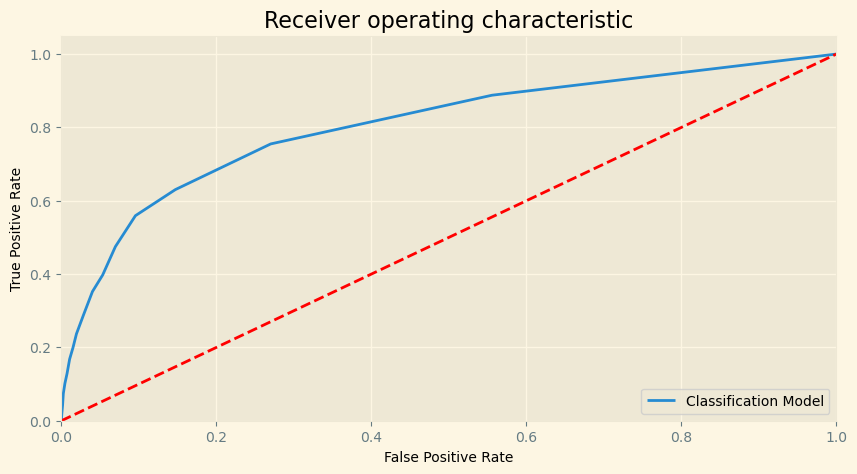

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 212  759]
 [ 119 7146]]
Outcome values : 
 212 759 119 7146
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.22      0.33       971
           0       0.90      0.98      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.3 %
Precision : 64.0 %
Recall : 21.8 %
F1 Score : 0.326
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 60.1 %
MCC : 0.332
roc_auc_score: 0.601


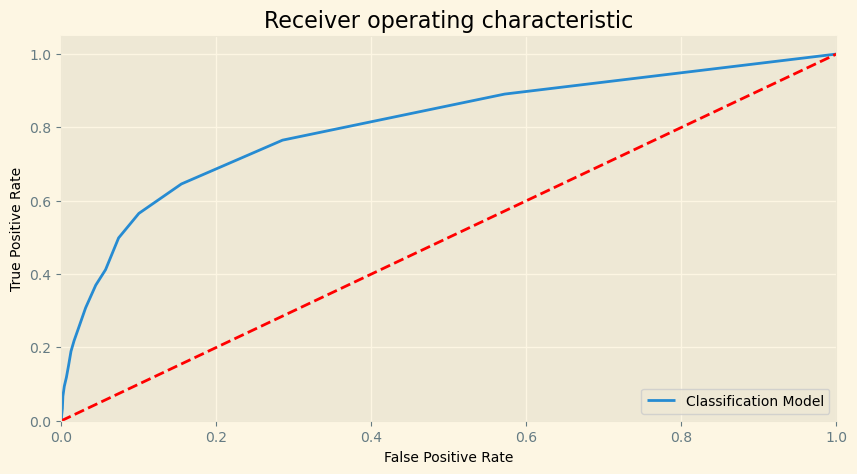

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 197  774]
 [ 100 7165]]
Outcome values : 
 197 774 100 7165
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.20      0.31       971
           0       0.90      0.99      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.78      0.59      0.63      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy : 89.4 %
Precision : 66.3 %
Recall : 20.3 %
F1 Score : 0.311
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 59.4 %
MCC : 0.327
roc_auc_score: 0.595


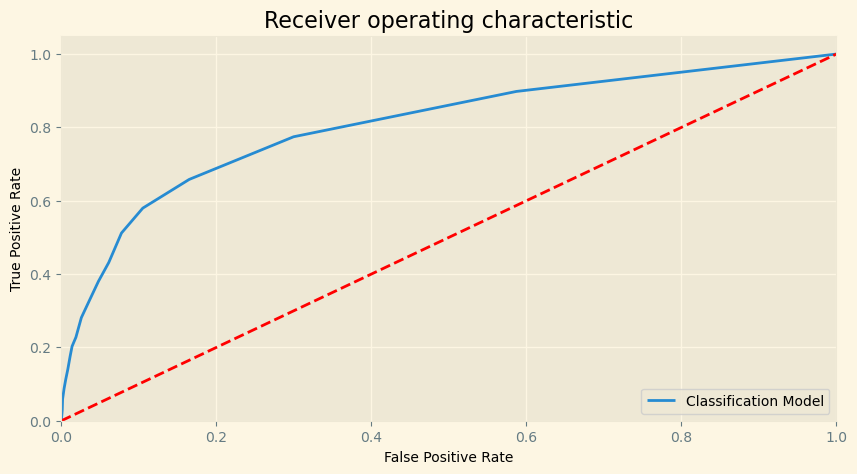

In [50]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


# Build the Calssification models and compare the results

In [53]:
EMResults= pd.read_csv('EMResults.csv')

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 476  495]
 [ 269 6996]]
Outcome values : 
 476 495 269 6996
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.49      0.55       971
           0       0.93      0.96      0.95      7265

    accuracy                           0.91      8236
   macro avg       0.79      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236

Accuracy score: 0.9072365225837785
Accuracy : 90.7 %
Precision : 63.9 %
Recall : 49.0 %
F1 Score : 0.555
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 72.6 %
MCC : 0.51
roc_auc_score: 0.727


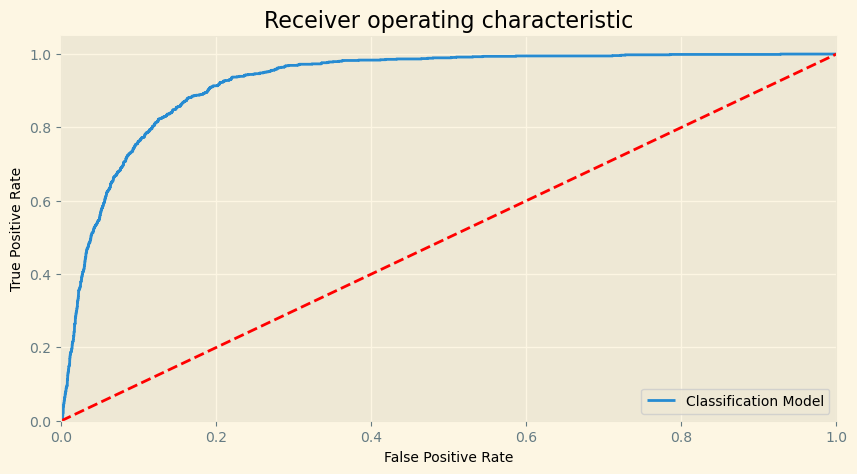

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 553  418]
 [ 726 6539]]
Outcome values : 
 553 418 726 6539
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.57      0.49       971
           0       0.94      0.90      0.92      7265

    accuracy                           0.86      8236
   macro avg       0.69      0.73      0.71      8236
weighted avg       0.88      0.86      0.87      8236

Accuracy score: 0.8610976202039825
Accuracy : 86.1 %
Precision : 43.2 %
Recall : 57.0 %
F1 Score : 0.492
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 73.5 %
MCC : 0.418
roc_auc_score: 0.735


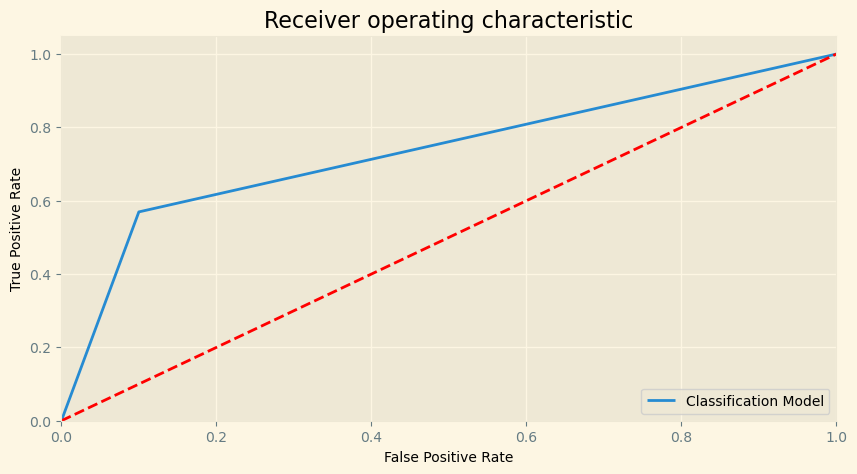

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 603  368]
 [ 434 6831]]
Outcome values : 
 603 368 434 6831
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.62      0.60       971
           0       0.95      0.94      0.94      7265

    accuracy                           0.90      8236
   macro avg       0.77      0.78      0.77      8236
weighted avg       0.91      0.90      0.90      8236

Accuracy score: 0.902622632345799
Accuracy : 90.3 %
Precision : 58.1 %
Recall : 62.1 %
F1 Score : 0.601
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 78.0 %
MCC : 0.546
roc_auc_score: 0.781


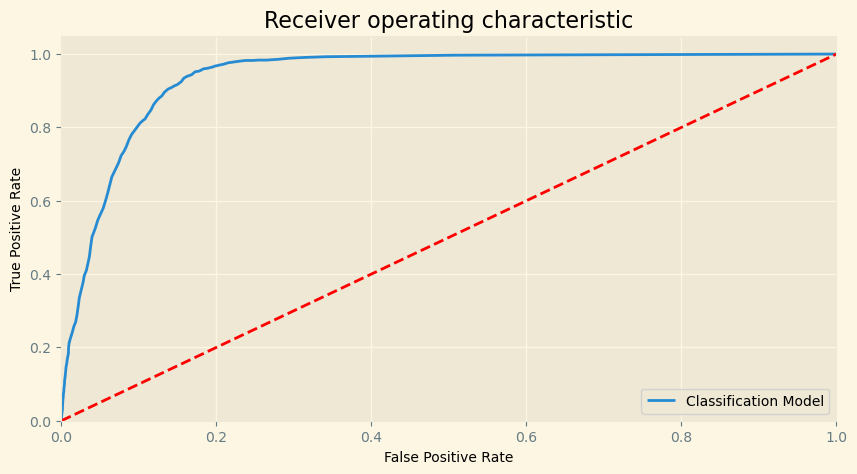

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 469  502]
 [ 312 6953]]
Outcome values : 
 469 502 312 6953
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.48      0.54       971
           0       0.93      0.96      0.94      7265

    accuracy                           0.90      8236
   macro avg       0.77      0.72      0.74      8236
weighted avg       0.89      0.90      0.90      8236

Accuracy score: 0.9011656143759106
Accuracy : 90.1 %
Precision : 60.1 %
Recall : 48.3 %
F1 Score : 0.535
Specificity or True Negative Rate : 95.7 %
Balanced Accuracy : 72.0 %
MCC : 0.484
roc_auc_score: 0.72


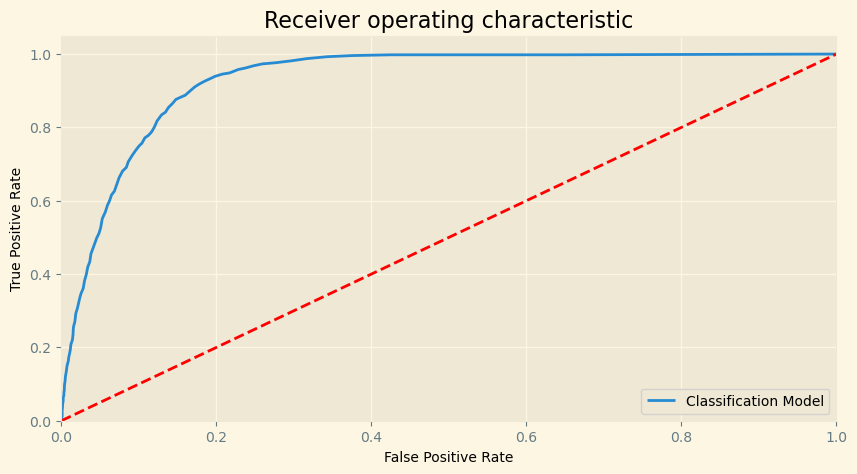

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 260  711]
 [ 209 7056]]
Outcome values : 
 260 711 209 7056
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.27      0.36       971
           0       0.91      0.97      0.94      7265

    accuracy                           0.89      8236
   macro avg       0.73      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

Accuracy score: 0.8882952889752307
Accuracy : 88.8 %
Precision : 55.4 %
Recall : 26.8 %
F1 Score : 0.361
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 61.9 %
MCC : 0.333
roc_auc_score: 0.619


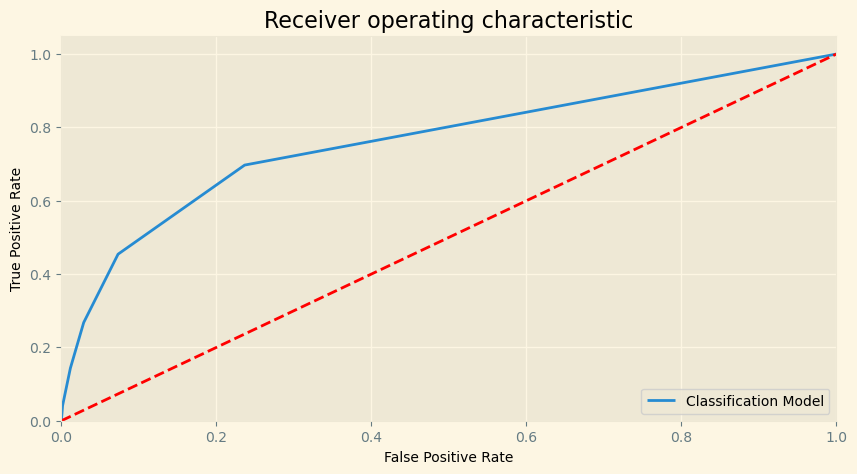

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 633  338]
 [ 988 6277]]
Outcome values : 
 633 338 988 6277
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.65      0.49       971
           0       0.95      0.86      0.90      7265

    accuracy                           0.84      8236
   macro avg       0.67      0.76      0.70      8236
weighted avg       0.88      0.84      0.86      8236

Accuracy score: 0.8389995143273433
Accuracy : 83.9 %
Precision : 39.0 %
Recall : 65.2 %
F1 Score : 0.488
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 75.8 %
MCC : 0.418
roc_auc_score: 0.758


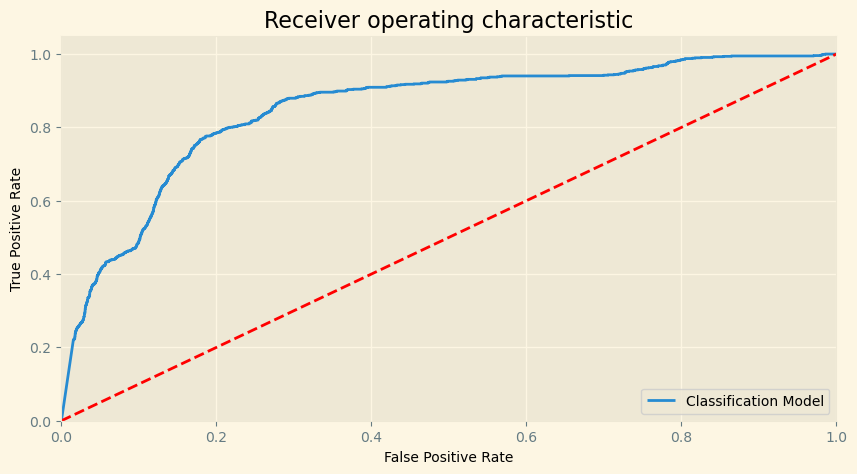

-----------------------------------------------------------------------------------------------------


In [54]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGB = GaussianNB()
# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,ModelGB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy score:',accuracy_score(y_pred,y_test))
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [55]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),476,495,269,6996,0.907,0.639,0.490,0.555,0.963,0.510,0.726595,0.726
1,DecisionTreeClassifier(),553,418,726,6539,0.861,0.432,0.570,0.492,0.900,0.418,0.734792,0.735
2,"(DecisionTreeClassifier(max_features='sqrt', r...",603,368,434,6831,0.903,0.581,0.621,0.601,0.940,0.546,0.780635,0.780
3,"(ExtraTreeClassifier(random_state=1137545775),...",469,502,312,6953,0.901,0.601,0.483,0.535,0.957,0.484,0.720031,0.720
4,KNeighborsClassifier(),260,711,209,7056,0.888,0.554,0.268,0.361,0.971,0.333,0.619499,0.619
5,GaussianNB(),633,338,988,6277,0.839,0.390,0.652,0.488,0.864,0.418,0.757955,0.758


# RandomForest Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier
ModelRF = RandomForestClassifier()
ModelRF.fit(x_train, y_train)
y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

Training Accuracy : 0.9999696417729205
Testing Accuracy : 0.9039582321515298


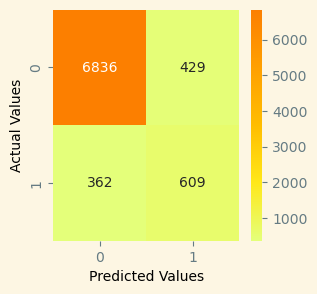

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

print("Training Accuracy :", ModelRF.score(x_train, y_train))
print("Testing Accuracy :", ModelRF.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [59]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)


Confusion matrix : 
 [[ 609  362]
 [ 429 6836]]


In [60]:
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 609 362 429 6836


In [61]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)



Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.63      0.61       971
           0       0.95      0.94      0.95      7265

    accuracy                           0.90      8236
   macro avg       0.77      0.78      0.78      8236
weighted avg       0.91      0.90      0.91      8236



In [62]:

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);

precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



Accuracy : 90.4 %
Precision : 58.7 %
Recall : 62.7 %
F1 Score : 0.606
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 78.4 %
MCC : 0.552
roc_auc_score: 0.784


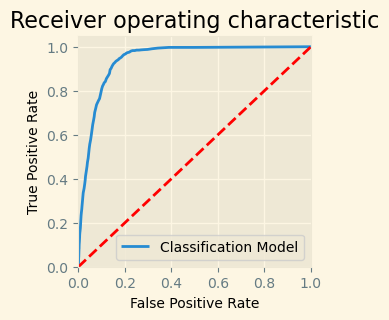

In [64]:
from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


#area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))




# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
Results = pd.DataFrame({'target_A': y_test, 'target_B': y_pred})
ResultsFinal = Bankdata_BK.merge(Results, left_index = True, right_index = True)
ResultsFinal.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target_A,target_B
7587,30,blue-collar,married,basic.6y,no,no,no,telephone,may,fri,88,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no,0,0
6905,33,admin.,married,professional.course,no,yes,yes,telephone,may,thu,140,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0,0
27423,57,services,married,unknown,no,yes,no,cellular,nov,fri,56,2,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,0
25461,40,technician,married,professional.course,unknown,yes,no,cellular,nov,wed,147,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no,0,0
29648,32,technician,single,professional.course,no,yes,no,cellular,apr,mon,54,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,0,0
